In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import corner

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [21]:
results = {}
for i in range(11):
    try:
        results[i] = dddm.load_chain(i)
    except FileNotFoundError:
        print(f"No result for {i}")
    print()

loading results/test0/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

No result for 1

No result for 2

loading results/test3/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/test4/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/test5/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/test6/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/test7/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/test8/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/test9/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/test10/
done loading
access result with:
['config', 'full_chain', 'flat_chain']



---0---


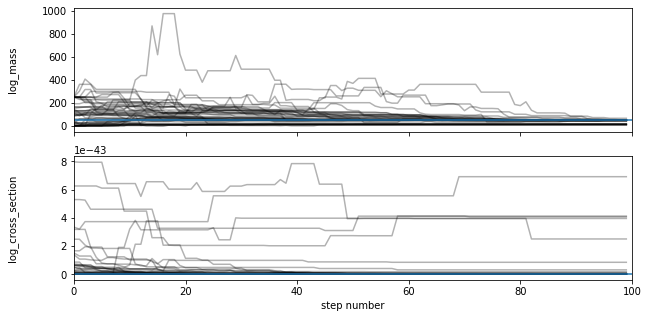

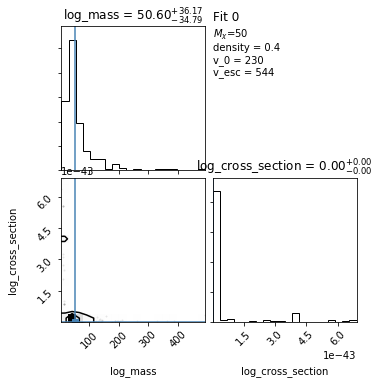

---3---


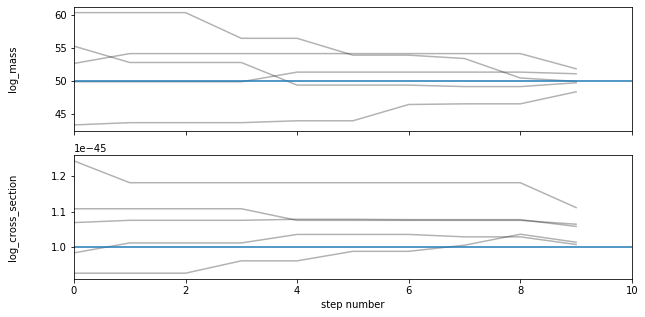

---4---


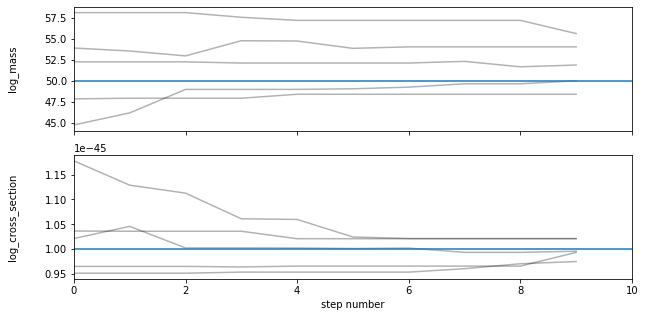

---5---


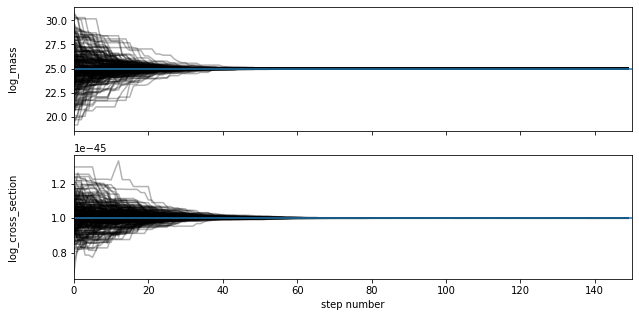

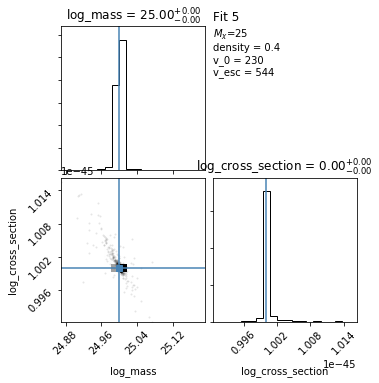

---6---


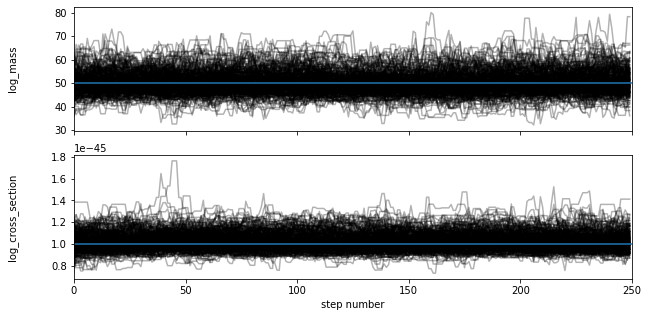

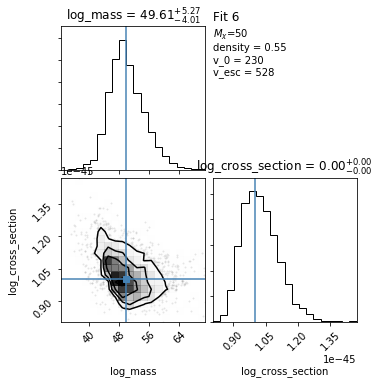

---7---


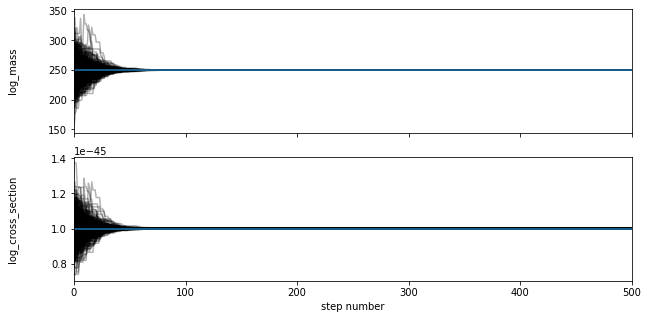

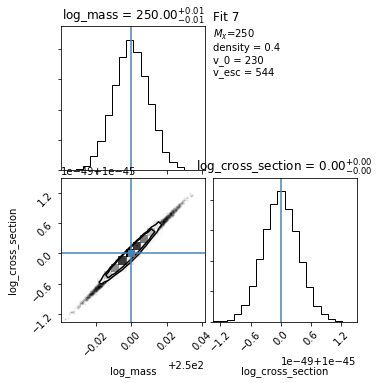

---8---


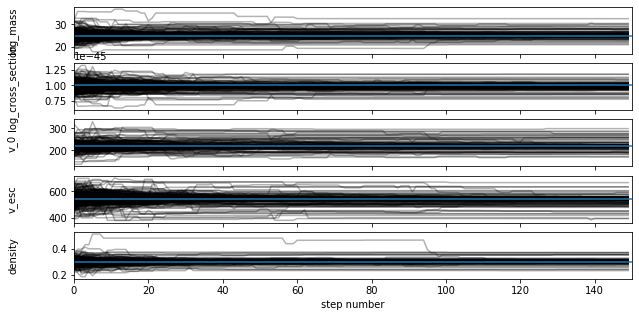

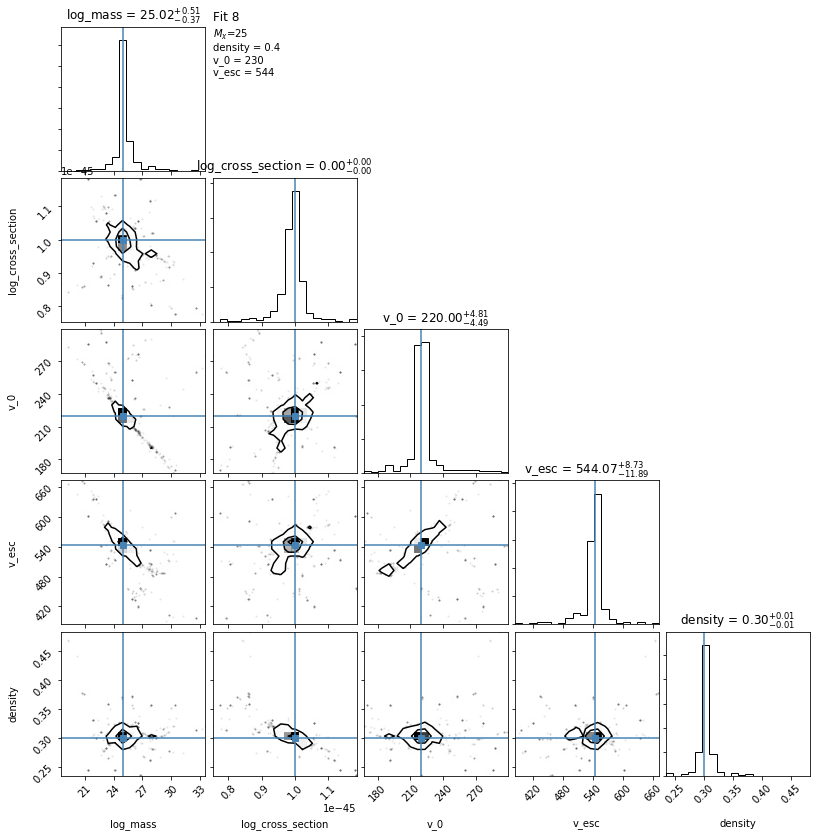

---9---


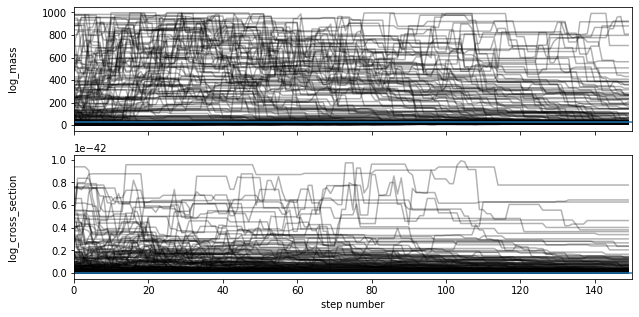

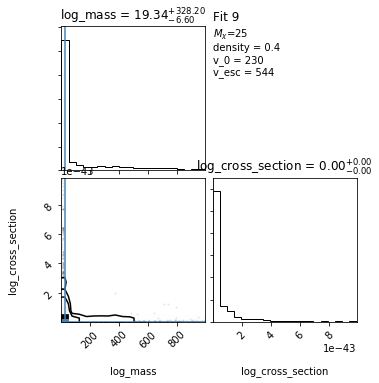

---10---


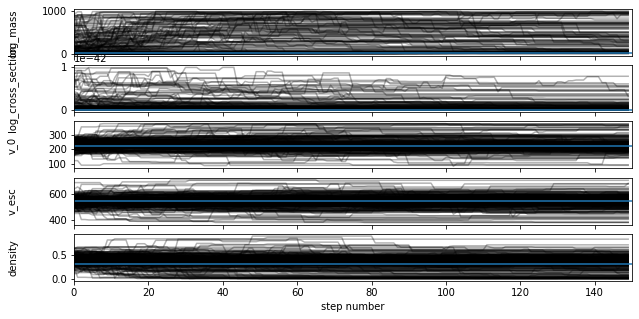

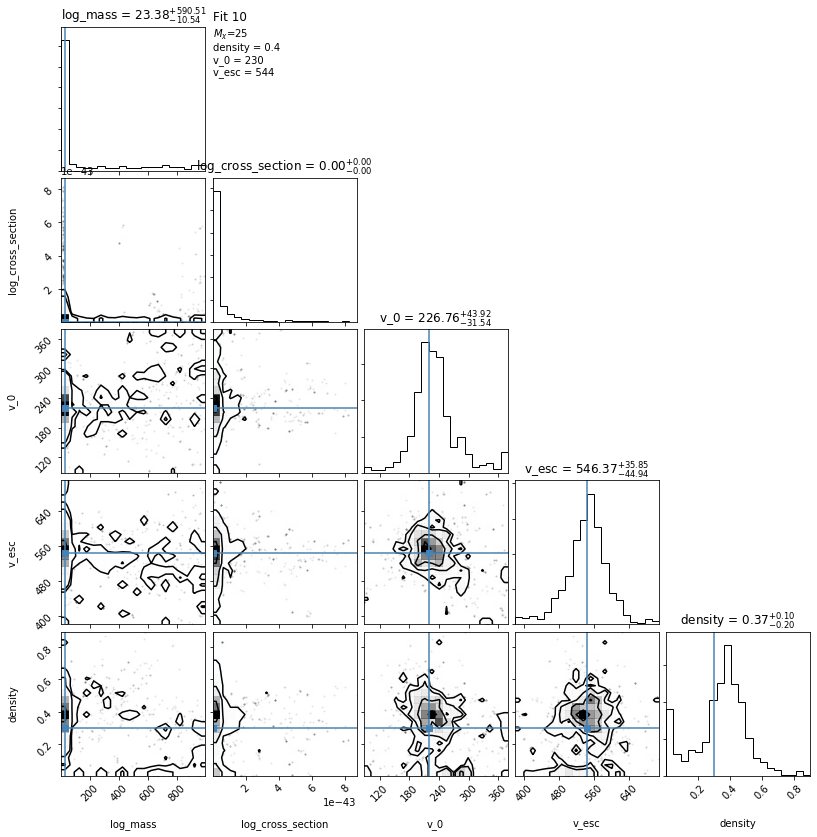

In [22]:
for key in results.keys():
    print(f"---{key}---")
    result = results[key]
    try:       
        info = "$M_\chi}$=" + f"{result['config'].item()['mw']}"
        for prior_key in result['config'].item()['prior'].keys():
            try:
                mean = result['config'].item()['prior'][prior_key]['mean']
                info += f"\n{prior_key} = {mean}"
            except KeyError:
                pass
            
        _, ndim = np.shape(result['flat_chain'])
        labels = ['log_mass',
                        'log_cross_section',
                        'v_0',
                        'v_esc',
                        'density'][:ndim]
        truths = [result['config'].item()['mw'],
                  result['config'].item()['sigma'],
                  result['config'].item()['v_0'],
                  result['config'].item()['v_esc'],
                  result['config'].item()['rho_0']
                  ][:ndim]
        
        fig, axes = plt.subplots(len(labels), figsize=(10, 5), sharex=True)
        samples = result['full_chain']
        for i in range(len(labels)):
            ax = axes[i]
            ax.plot(samples[:, :, i], "k", alpha=0.3)
            ax.axhline(truths[i])
            ax.set_xlim(0, len(samples))
            ax.set_ylabel(labels[i])
            ax.yaxis.set_label_coords(-0.1, 0.5)
            
        axes[-1].set_xlabel("step number")
        plt.show()
        
        fig= corner.corner(result['flat_chain'],
                            labels = labels,
                            truths = truths,
#                             quantiles=[0.05, 0.5, 0.95],
                           show_titles=True
                           );
#         fig.suptitle(f"Fit {key}\n\n\n")
        fig.axes[1].set_title(f"Fit {key}", loc = 'left')
        fig.axes[1].text(0,1,info, verticalalignment = 'top')
        plt.show()
        
    
    except AssertionError:
        pass